In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("C:\\Users\\Shridatta\\Desktop\\city_day.csv\\city_day.csv")

In [3]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## Exploratory Data Analysis

In [4]:
dataset.shape

(29531, 16)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
dataset.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

#### NaN values in dataset.

In [7]:
dataset.duplicated().values.any()

False

#### No duplicate values in dataset.

In [8]:
dataset.AQI_Bucket.unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

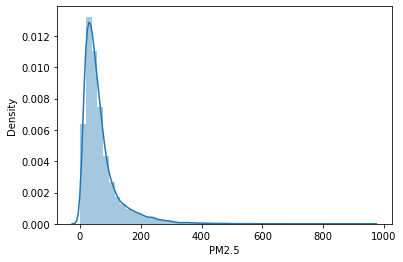

In [9]:
sns.distplot(dataset['PM2.5'])

In [10]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

PM2.5 0.1557  % missing values
PM10 0.3772  % missing values
NO 0.1213  % missing values
NO2 0.1214  % missing values
NOx 0.1417  % missing values
NH3 0.3497  % missing values
CO 0.0697  % missing values
SO2 0.1305  % missing values
O3 0.1362  % missing values
Benzene 0.1904  % missing values
Toluene 0.2723  % missing values
Xylene 0.6132  % missing values
AQI 0.1585  % missing values
AQI_Bucket 0.1585  % missing values


#### Percentage of NaN values in dataset.
     1. Xylene data is having more NaN values.

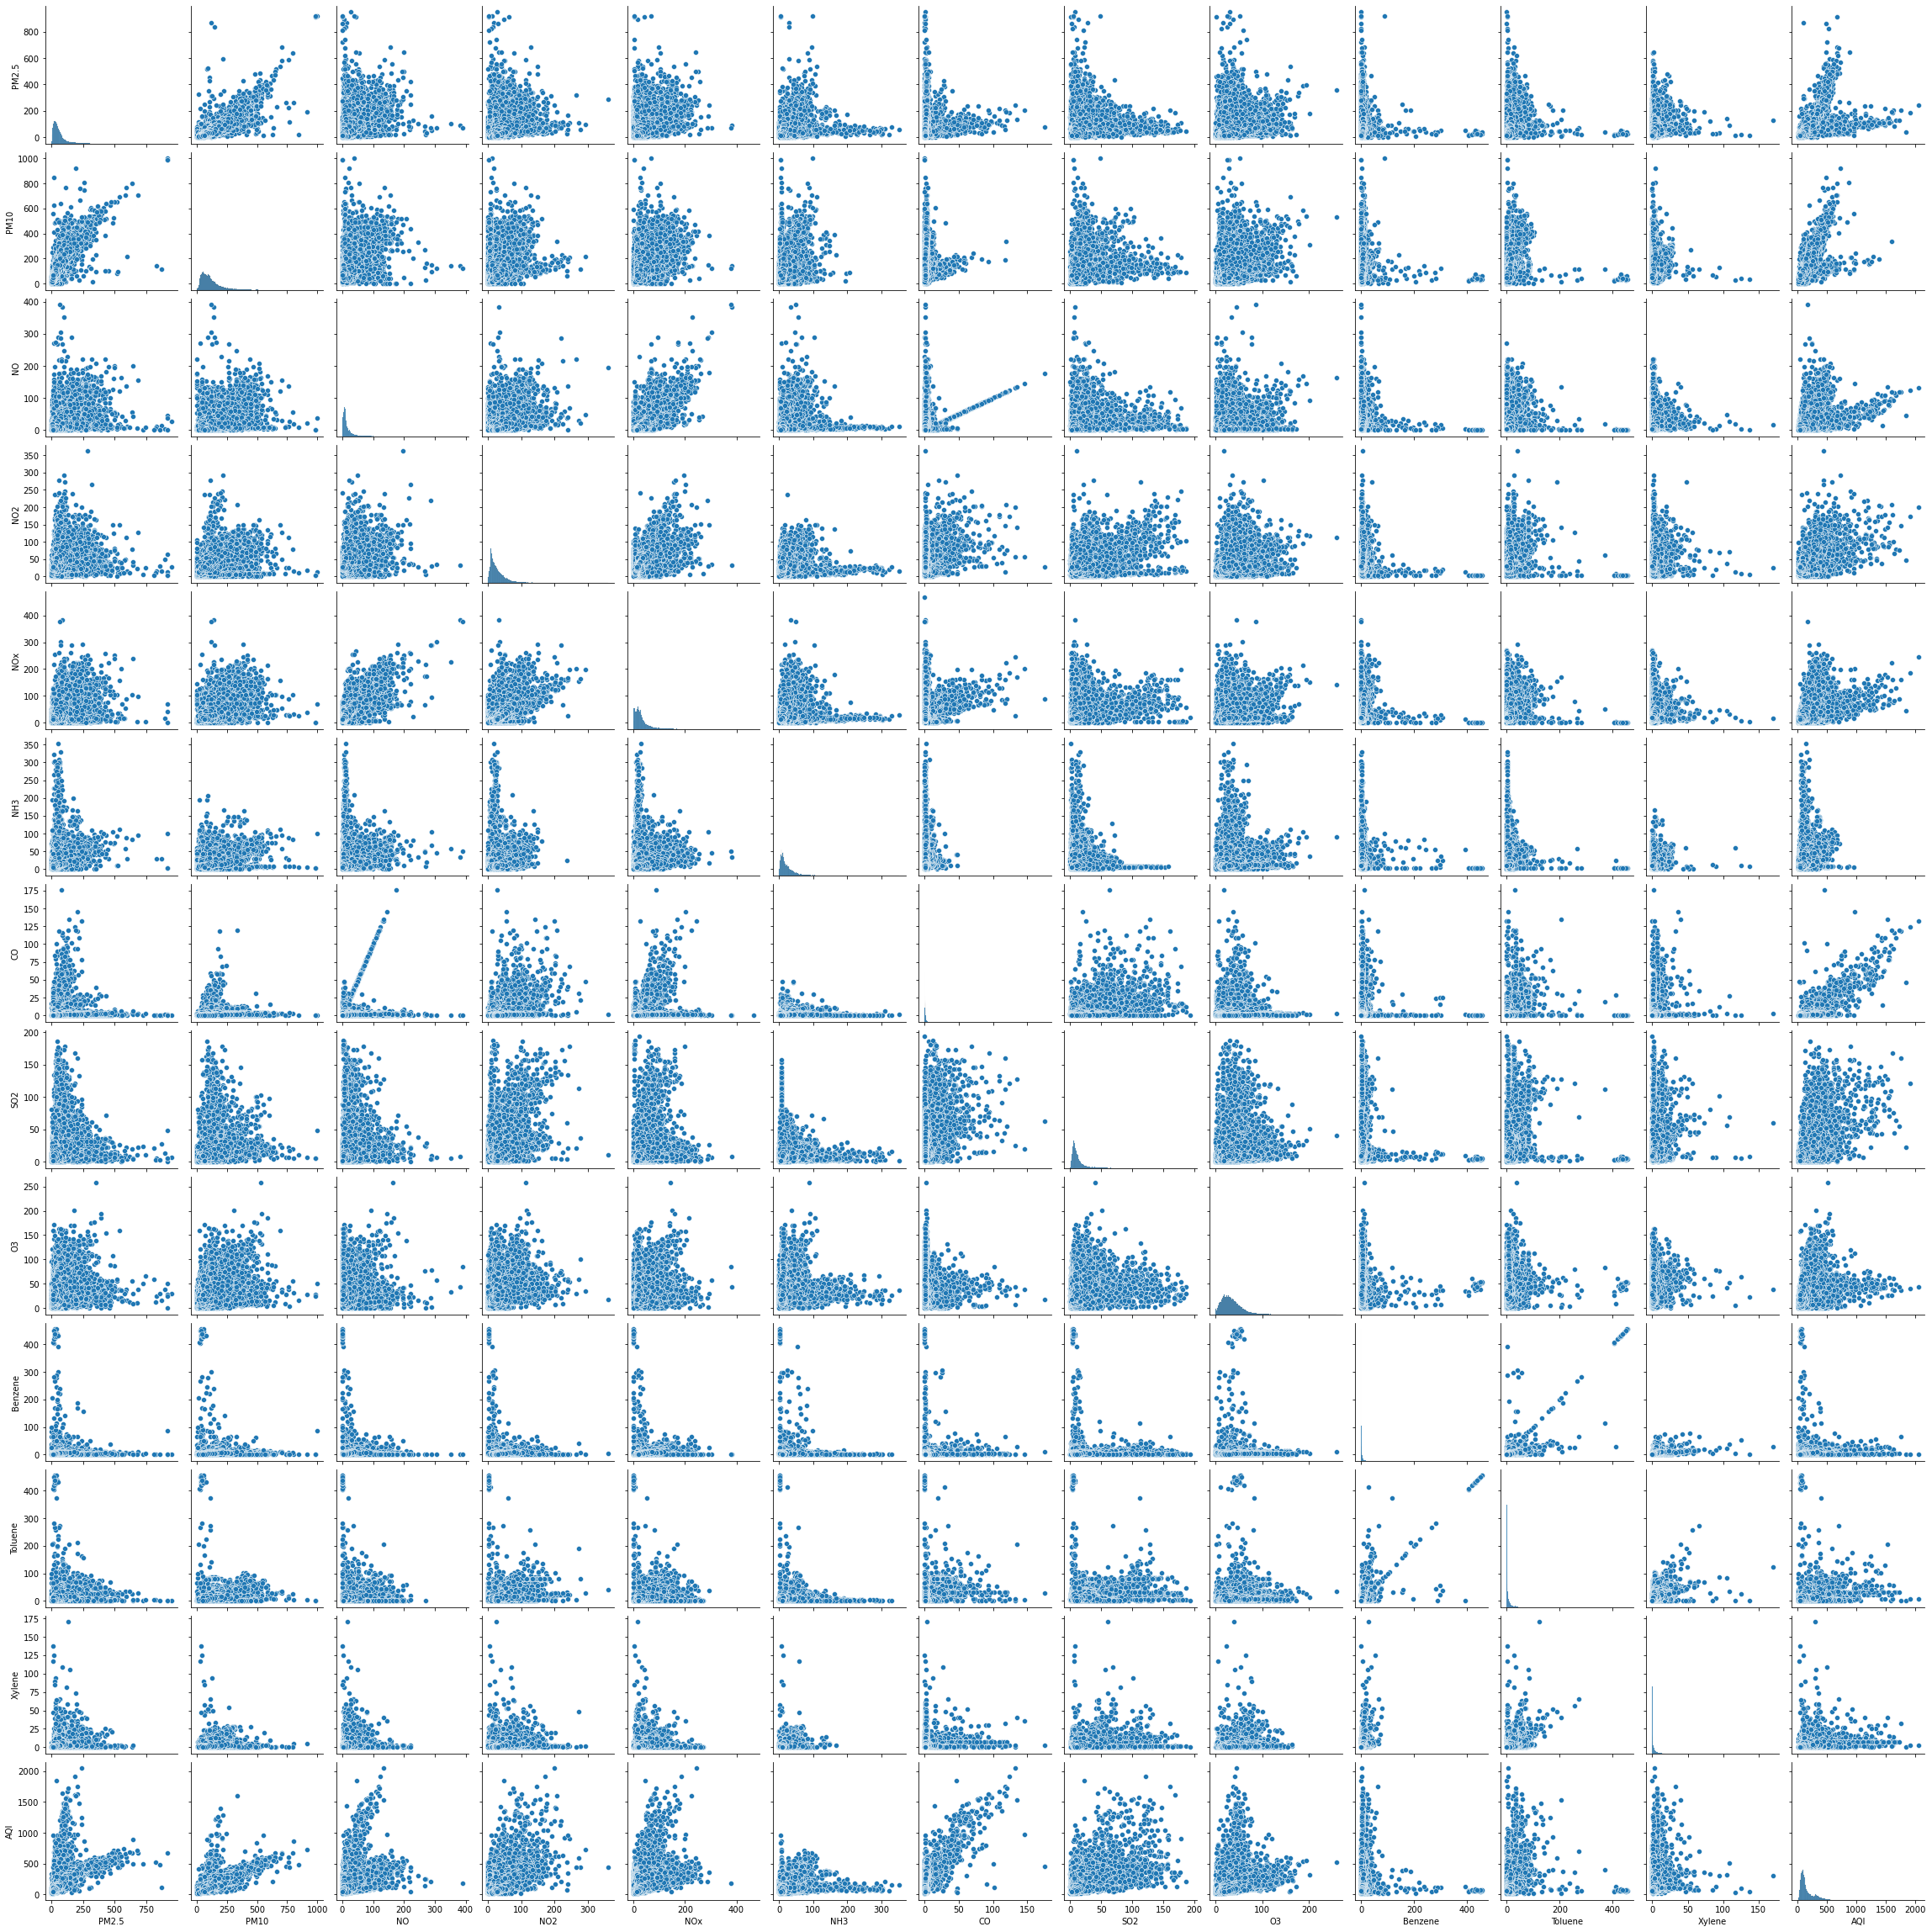

In [11]:
sns.pairplot(dataset)

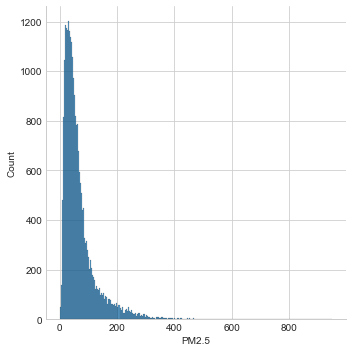

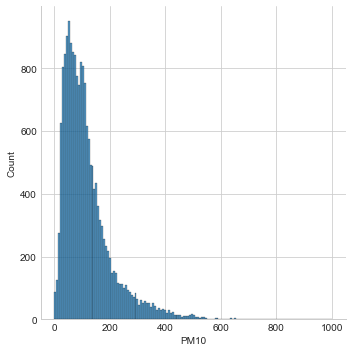

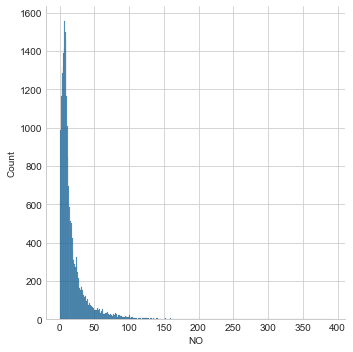

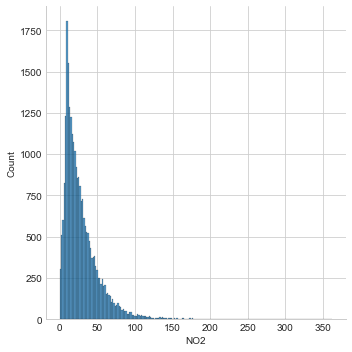

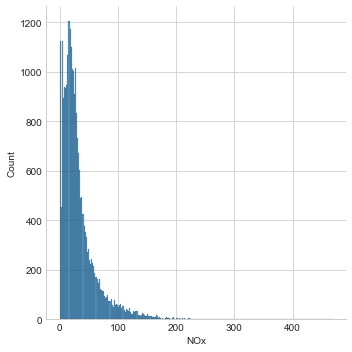

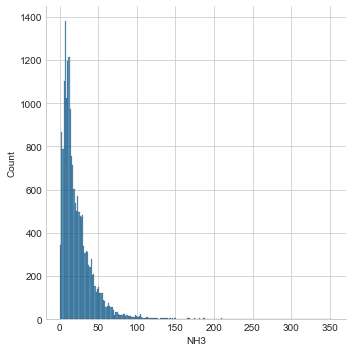

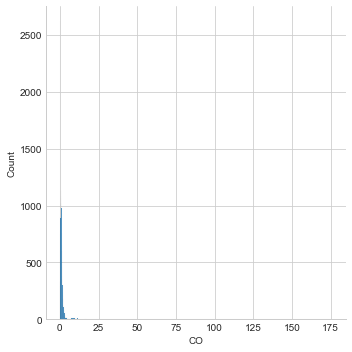

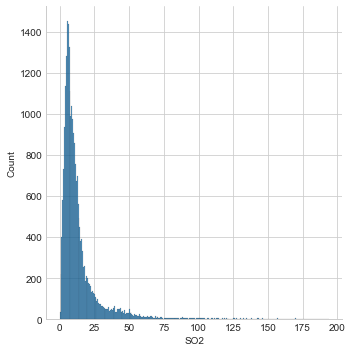

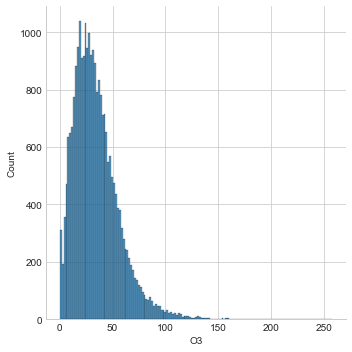

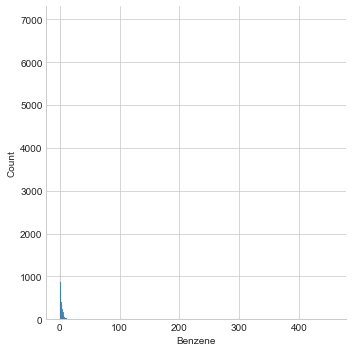

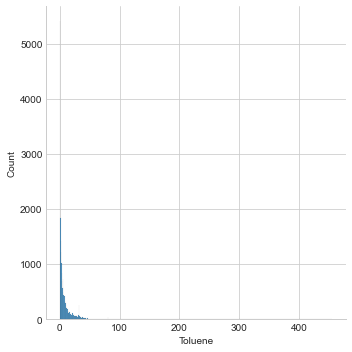

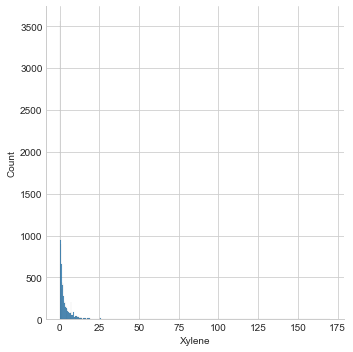

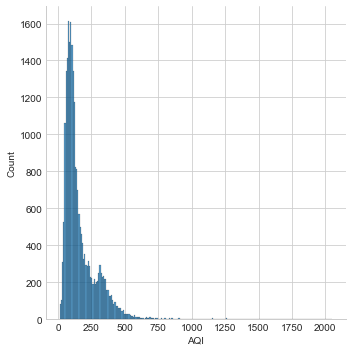

In [160]:
#### Distribution of the data.
for feature in dataset[features_with_na[0:-1]]:
    sns.displot(dataset[feature])

In [11]:
dataset[features_with_na[0:-1]]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


<AxesSubplot:xlabel='AQI_Bucket', ylabel='count'>

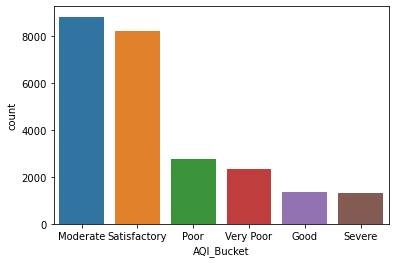

In [12]:
sns.countplot(dataset['AQI_Bucket'],order=dataset.AQI_Bucket.value_counts().index)

In [156]:
# how much is the average amount of pollution in each city stations
most_polluted = dataset[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,452.122939,114.584029,22.193407
Delhi,259.487744,232.809229,1.976053
Patna,240.782042,126.747958,1.533591
Gurugram,225.123882,191.504432,1.257516
Lucknow,217.973059,NaN,2.130328
Talcher,172.886819,165.772708,1.847722
Jorapokhar,159.251621,149.657942,0.663049
Brajrajnagar,150.280505,124.217373,1.798274
Kolkata,140.566313,115.629499,0.799251


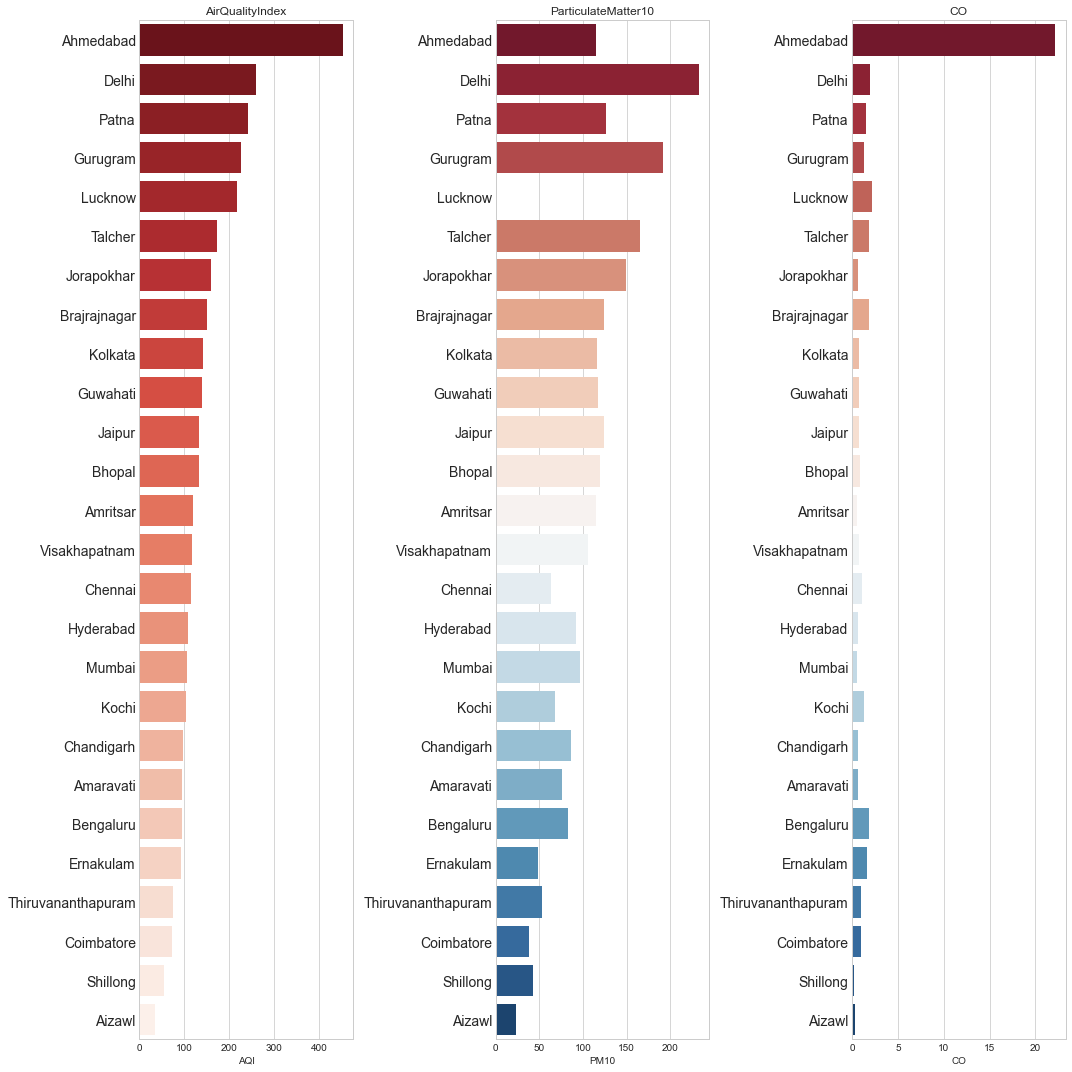

In [157]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

## Feature Engineering

In [13]:
dataset['PM2.5'].median()

48.57

In [14]:
data=dataset[features_with_na]

In [15]:
data['PM2.5'].fillna(data['PM2.5'].median(),inplace=True)
data['PM10'].fillna(data['PM10'].median(),inplace=True)
data['NO'].fillna(data['NO'].median(),inplace=True)
data['NO2'].fillna(data['NO2'].median(),inplace=True)
data['NOx'].fillna(data['NOx'].median(),inplace=True)
data['NH3'].fillna(data['NH3'].median(),inplace=True)
data['CO'].fillna(data['CO'].median(),inplace=True)
data['SO2'].fillna(data['SO2'].median(),inplace=True)
data['O3'].fillna(data['O3'].median(),inplace=True)
data['Benzene'].fillna(data['Benzene'].median(),inplace=True)
data['Toluene'].fillna(data['Toluene'].median(),inplace=True)
data['Xylene'].fillna(data['Xylene'].median(),inplace=True)
data['AQI'].fillna(data['AQI'].median(),inplace=True)
data['AQI_Bucket'].fillna(data['AQI_Bucket'].mode(),inplace=True)

#### Handling the missing values.

In [162]:
data.AQI_Bucket.value_counts()

Moderate        8830
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

## Model Building and Analysis

In [18]:
X=data.drop(['AQI','AQI_Bucket'],axis=1)
y=data.AQI

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [20]:
scaler=StandardScaler()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

In [24]:
lr_model=LinearRegression()

In [25]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_lr_pre=lr_model.predict(X_test)

In [27]:
print(r2_score(y_test,y_lr_pre))

0.8232408884458073


In [28]:
lr_model.score(X_train,y_train)

0.7817093346312567

In [29]:
lr_model.score(X_test,y_test)

0.8232408884458073

In [30]:
mean_absolute_error(y_test,y_lr_pre)

29.78551147415515

In [31]:
np.sqrt(mean_squared_error(y_test,y_lr_pre))

53.09471570070065

<AxesSubplot:xlabel='AQI', ylabel='Density'>

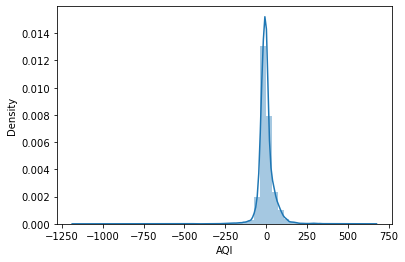

In [32]:
sns.distplot(y_test-y_lr_pre)

<AxesSubplot:xlabel='AQI'>

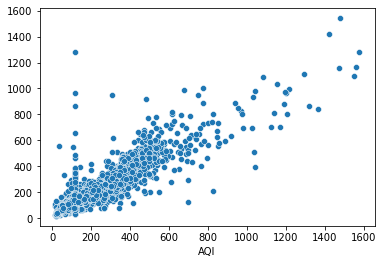

In [33]:
sns.scatterplot(x=y_test,y=y_lr_pre)

In [124]:
rfm=RandomForestRegressor(n_estimators=400,max_depth=16,min_samples_leaf=4)

In [125]:
rfm.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, min_samples_leaf=4, n_estimators=400)

In [126]:
y_rf_pre=rfm.predict(X_test)

In [127]:
print(r2_score(y_test,y_rf_pre))

0.8937566319139139


In [128]:
rfm.score(X_train,y_train)

0.9403699684756027

In [129]:
rfm.score(X_test,y_test)

0.8937566319139139

In [130]:
mean_absolute_error(y_test,y_rf_pre)

19.993662453537596

In [131]:
np.sqrt(mean_squared_error(y_test,y_rf_pre))

41.16340667732332

<AxesSubplot:xlabel='AQI', ylabel='Density'>

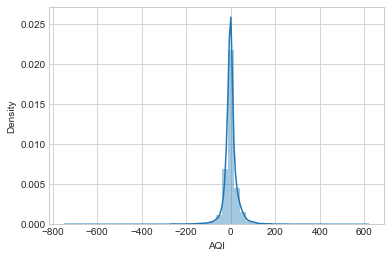

In [132]:
sns.distplot(y_test-y_rf_pre)

<AxesSubplot:xlabel='AQI'>

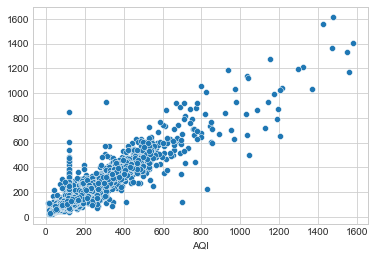

In [133]:
sns.scatterplot(x=y_test,y=y_rf_pre)

In [134]:
y_rf_pre

array([117.6137621 , 117.6137621 , 127.42271581, ...,  96.92850913,
       106.44893024, 124.98170328])

In [166]:
X_test[0]

array([-0.26324563, -0.18730554, -0.31886044, -0.26213427, -0.25910109,
       -0.23557651, -0.31560507, -0.2744025 , -0.15268653, -0.12582933,
       -0.24504481, -0.19500915])

## Saving the model in pickle file

In [163]:
import pickle

In [164]:
file='Air_quality_index.pkl'
pickle.dump(rfm,open(file,'wb'))

In [165]:
file='scaler.pkl'
pickle.dump(scaler,open(file,'wb'))